# EXPONENTIAL SMOOTHING

* Single or Simple (SES)
* DOUBLE
* TRIPLE



In [20]:

#TIME SERIES FORECASTING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [2]:

data = pd.read_csv('AirPassengers.csv')

In [3]:



dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

data.head()



C:\Users\admin\AppData\Local\Temp\ipykernel_10664\1263488662.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [87]:
ts=data

ts_log = np.log(ts)

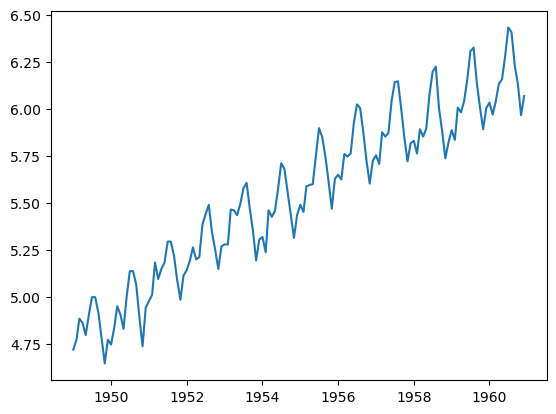

In [88]:
plt.plot(ts_log)

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose


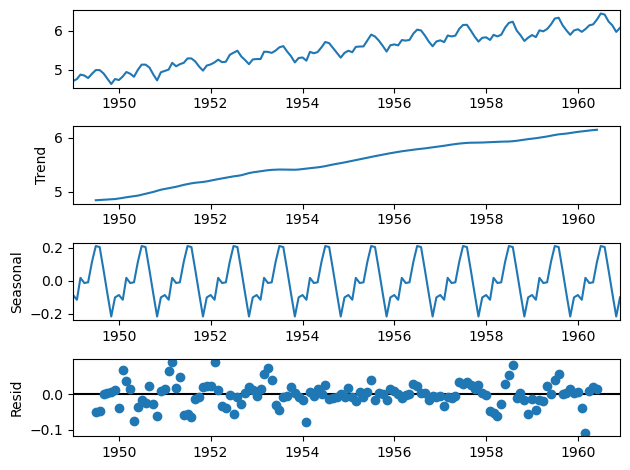

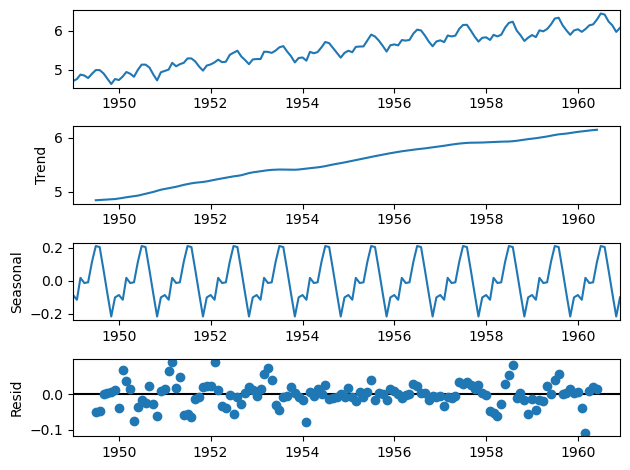

In [90]:
decomposition = seasonal_decompose(ts_log)
decomposition.plot()

In [93]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing


In [40]:
ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
#train test split 

In [41]:
train = ts_log.head(130)

test = ts_log.tail(14)

In [43]:
test

,#Passengers
Month,
1959-11-01,5.891644
1959-12-01,6.003887
1960-01-01,6.033086
1960-02-01,5.968708
1960-03-01,6.037871
1960-04-01,6.133398
1960-05-01,6.156979
1960-06-01,6.282267
1960-07-01,6.432940


In [44]:
#SINGLE

model = SimpleExpSmoothing(train)

result = model.fit()

result

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
result.predict(start=130,end=143)

1959-11-01    6.008813
1959-12-01    6.008813
1960-01-01    6.008813
1960-02-01    6.008813
1960-03-01    6.008813
1960-04-01    6.008813
1960-05-01    6.008813
1960-06-01    6.008813
1960-07-01    6.008813
1960-08-01    6.008813
1960-09-01    6.008813
1960-10-01    6.008813
1960-11-01    6.008813
1960-12-01    6.008813
Freq: MS, dtype: float64

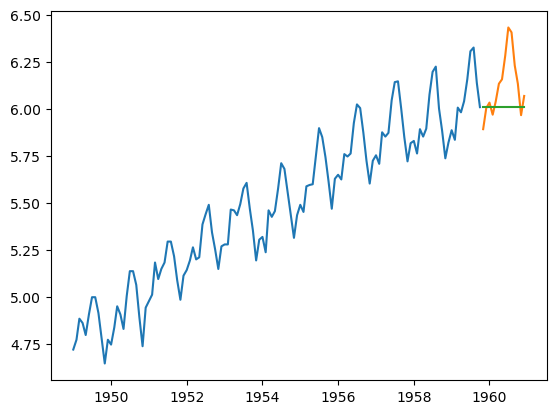

In [47]:

plt.plot(train)

plt.plot(test)

plt.plot(result.predict(start=130,end=143))


# EXPLANATION

#### SINGLE OR SIMPLE -- SES equation

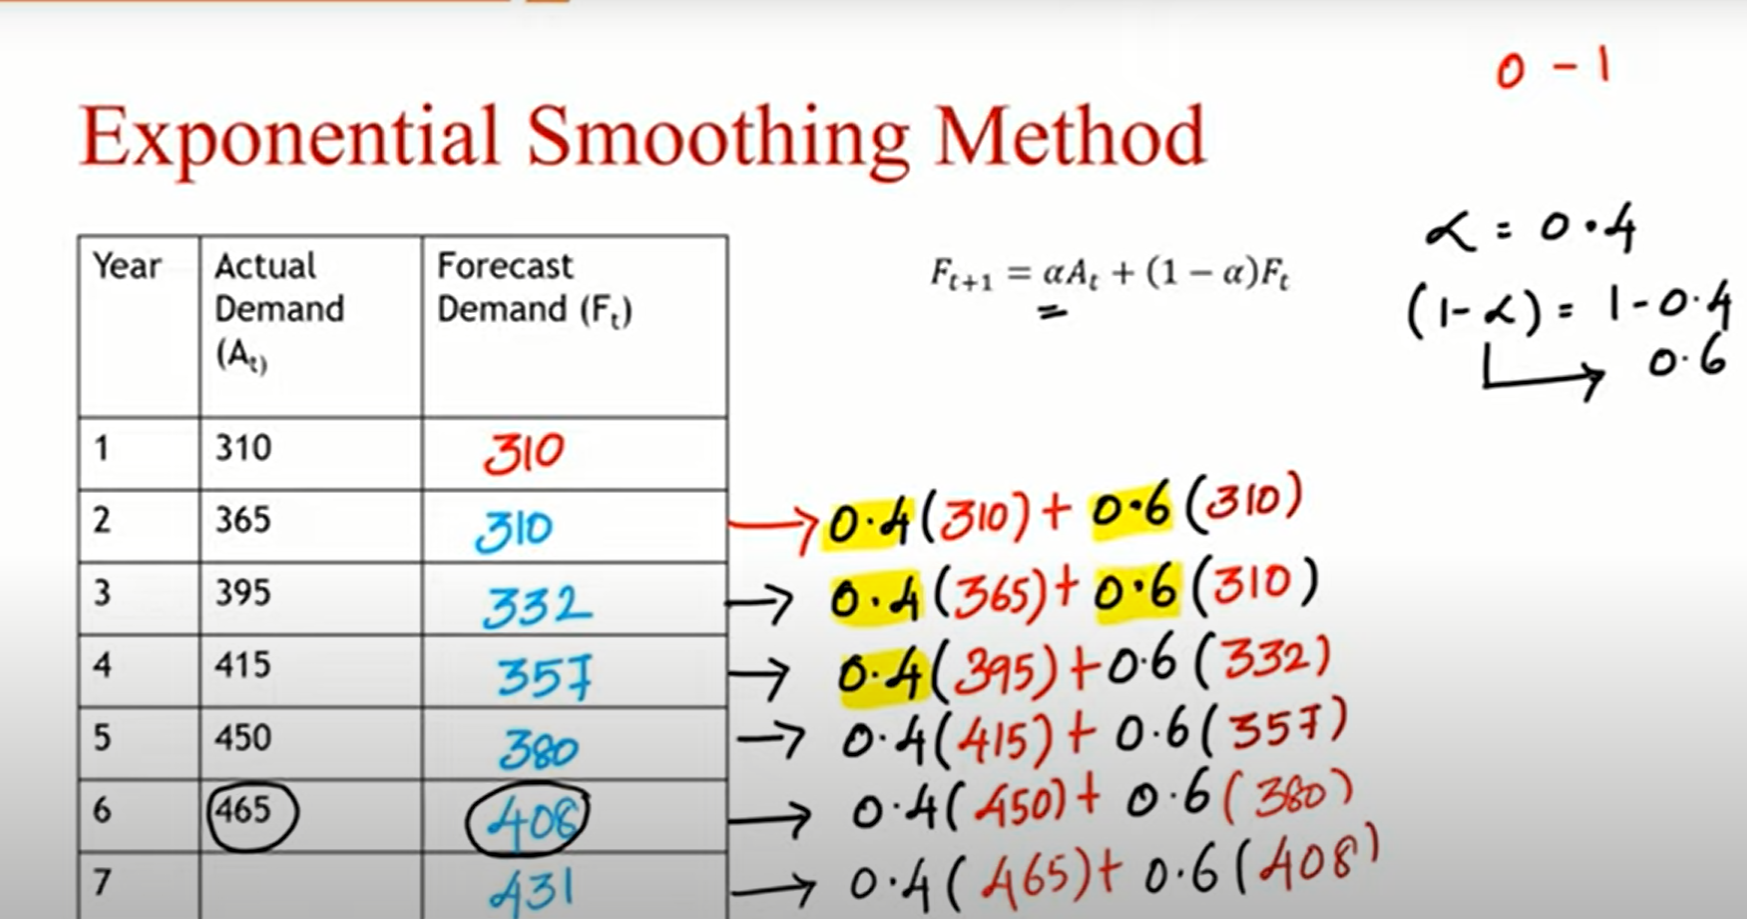

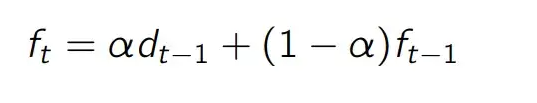

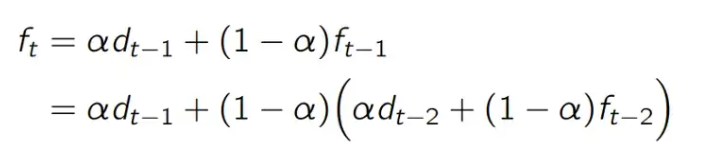
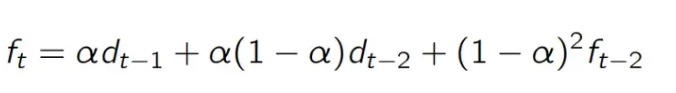
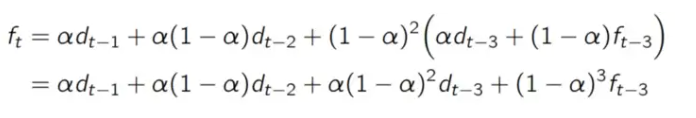
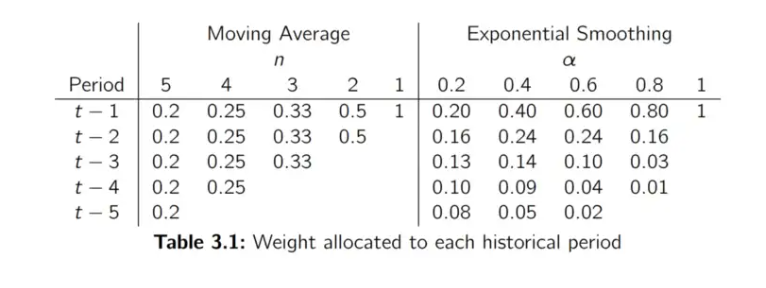

# ADDTIVE and MULTIPLICATIVE TYPES of TS

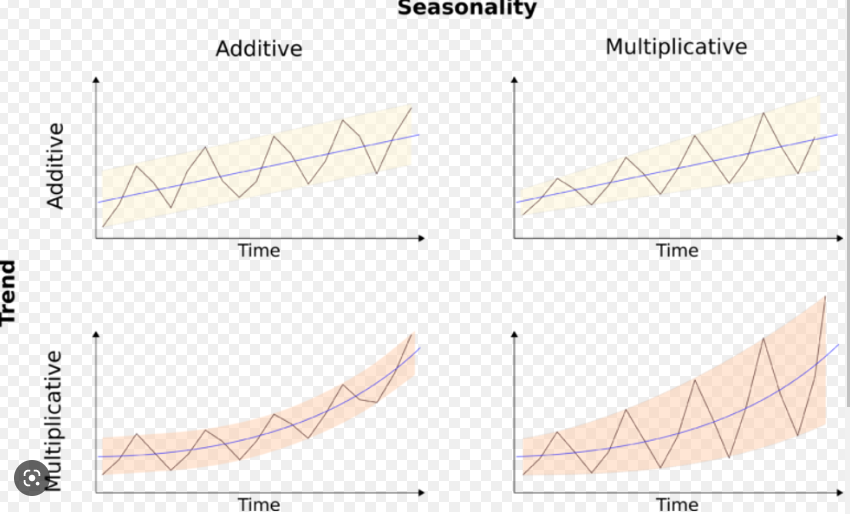

# DOUBLE

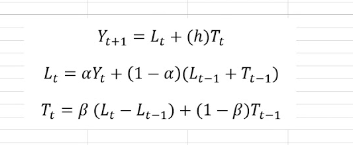

# TRIPLE

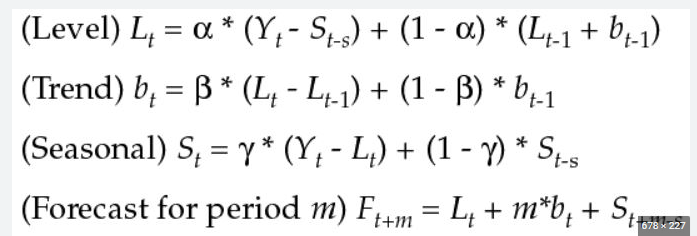

In [56]:
??ExponentialSmoothing

In [96]:

#GENERALIZATION OF ses MODEL  -- des tes


for i in [.01,.02,.05,.2,.4,.6,.8,1]:
    model = ExponentialSmoothing(train, 
                             trend="add",
                             seasonal="add", 
                             seasonal_periods=12, 
    initialization_method="known",
    initial_level=i,
    initial_trend=i,
    initial_seasonal=i)
    
    fitted_model = model.fit()
    
    RMSE = np.sqrt(np.mean((test["#Passengers"] - fitted_model.predict(start=130,end=143))**2))
    print(i)
    print(RMSE)


    


   


   
   

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


0.01
0.04493579899438933
0.02
0.044898259017064034


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


0.05
0.04488078195056528
0.2
0.044883866760120676


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


0.4
0.044899953923166876


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


0.6
0.044370547718485365
0.8
0.04496206083338554


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1
0.044930510342283236


In [79]:
test["#Passengers"] - model_fit.predict(start=130,end=143)

Month
1959-11-01    0.013024
1959-12-01   -0.008250
1960-01-01    0.002488
1960-02-01   -0.051726
1960-03-01   -0.084793
1960-04-01    0.094328
1960-05-01    0.040799
1960-06-01    0.003846
1960-07-01    0.037681
1960-08-01   -0.016879
1960-09-01   -0.046296
1960-10-01    0.018776
1960-11-01   -0.028644
1960-12-01   -0.029220
dtype: float64

In [78]:
train

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1959-06-01,6.156979
1959-07-01,6.306275
1959-08-01,6.326149


In [69]:
model_fit2 = model.fit()

In [67]:
model_fit.predict(start=130,end=143)

1959-11-01    5.878620
1959-12-01    6.012137
1960-01-01    6.030598
1960-02-01    6.020434
1960-03-01    6.122664
1960-04-01    6.039070
1960-05-01    6.116180
1960-06-01    6.278421
1960-07-01    6.395259
1960-08-01    6.423759
1960-09-01    6.276778
1960-10-01    6.114622
1960-11-01    5.994791
1960-12-01    6.097645
Freq: MS, dtype: float64

In [70]:
model_fit2.predict(start=130,end=143)

1959-11-01    5.878580
1959-12-01    6.012183
1960-01-01    6.030572
1960-02-01    6.020375
1960-03-01    6.122624
1960-04-01    6.038998
1960-05-01    6.116175
1960-06-01    6.278515
1960-07-01    6.395318
1960-08-01    6.423757
1960-09-01    6.276874
1960-10-01    6.114548
1960-11-01    5.994767
1960-12-01    6.097673
Freq: MS, dtype: float64

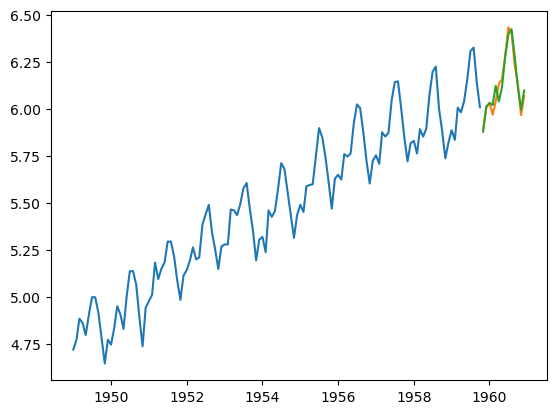

In [59]:

plt.plot(train)

plt.plot(test)

plt.plot(model_fit.predict(start=130,end=143))


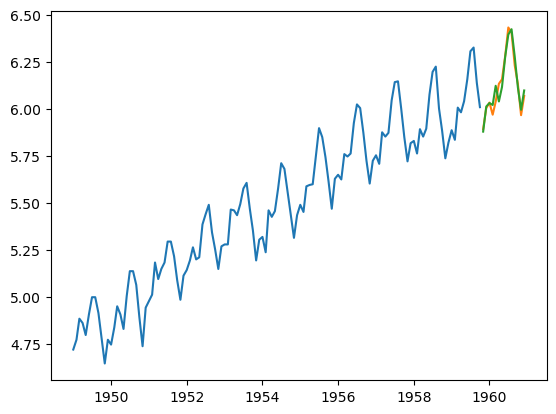

In [66]:

plt.plot(train)

plt.plot(test)

plt.plot(model_fit.predict(start=130,end=143))

In [11]:
predictions_ = model_fit.predict(start=144, end=200)


In [12]:
predictions_

1961-01-01    6.112514
1961-02-01    6.058422
1961-03-01    6.183254
1961-04-01    6.235084
1961-05-01    6.265412
1961-06-01    6.400846
1961-07-01    6.545200
1961-08-01    6.534774
1961-09-01    6.352308
1961-10-01    6.235645
1961-11-01    6.082130
1961-12-01    6.191880
1962-01-01    6.229877
1962-02-01    6.175785
1962-03-01    6.300617
1962-04-01    6.352448
1962-05-01    6.382775
1962-06-01    6.518209
1962-07-01    6.662564
1962-08-01    6.652138
1962-09-01    6.469672
1962-10-01    6.353008
1962-11-01    6.199494
1962-12-01    6.309243
1963-01-01    6.347240
1963-02-01    6.293148
1963-03-01    6.417981
1963-04-01    6.469811
1963-05-01    6.500139
1963-06-01    6.635572
1963-07-01    6.779927
1963-08-01    6.769501
1963-09-01    6.587035
1963-10-01    6.470371
1963-11-01    6.316857
1963-12-01    6.426606
1964-01-01    6.464603
1964-02-01    6.410511
1964-03-01    6.535344
1964-04-01    6.587174
1964-05-01    6.617502
1964-06-01    6.752935
1964-07-01    6.897290
1964-08-01 

In [72]:
??model

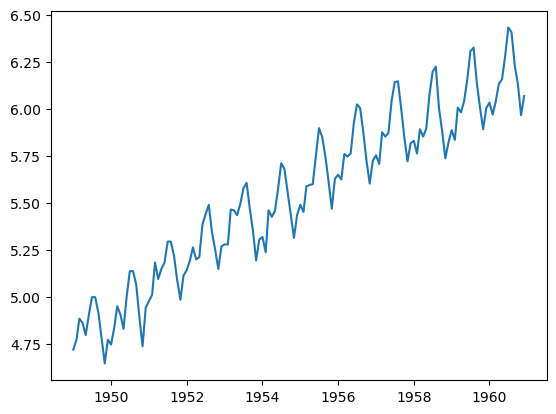

In [14]:
plt.plot(ts_log)


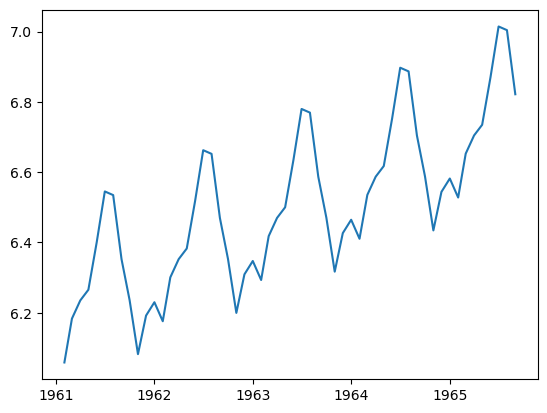

In [15]:


plt.plot(predictions_[1:200])

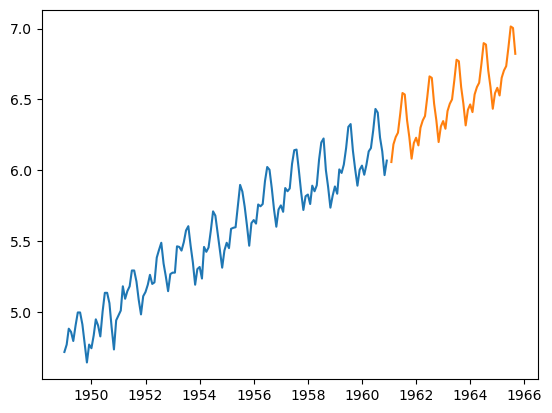

In [97]:

plt.plot(ts_log)

plt.plot(predictions_[1:200])

In [17]:
predictions_.shape

(57,)

# ----------------------------------------------------------------------------------------

## OTHER TSA MODELS that you can also read ---

# fb prophet 
# uber- ORBIT

# XGBOOST

# Neural networks